<a href="https://colab.research.google.com/github/linyubo/CE888code/blob/main/assginment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download econml

In [ ]:
!pip install econml

     |████████████████████████████████| 3.3 MB 7.3 MB/s 
     |████████████████████████████████| 123 kB 60.8 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
     |████████████████████████████████| 356 kB 60.9 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491653 sha256=f47a111c9c7f131fce48f7612ddad3f68c4cabe0ad2870f8fe4378ffd78a540a
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


Import libaries

In [ ]:
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!wget https://github.com/dmachlanski/CE888_2022/raw/main/project/data/ihdp.npz
!wget https://github.com/dmachlanski/CE888_2022/raw/main/project/data/jobs.npz

--2022-02-19 16:25:52--  https://github.com/dmachlanski/CE888_2022/raw/main/project/data/ihdp.npz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.npz [following]
--2022-02-19 16:25:53--  https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174506 (170K) [application/octet-stream]
Saving to: ‘ihdp.npz’

ihdp.npz            100%[===================>] 170.42K  --.-KB/s    in 0.01s   

2022-02-19 16:25:53 (11.6 MB/s) - ‘ihdp.npz’ saved [174506/174506]

--2022-02-19 16:25:53-- 

In [ ]:
ihdp = np.load('ihdp.npz')
jobs = np.load('jobs.npz')

In [ ]:
ihdp.files

['x', 't', 'yf', 'ycf', 'ite']

In [ ]:
for f in ihdp.files:
  print(f'{f}: {ihdp[f].shape}')

x: (747, 25)
t: (747, 1)
yf: (747, 1)
ycf: (747, 1)
ite: (747, 1)


In [ ]:
ihdp['x']

array([[ 1.39739503,  0.99634625, -1.10562395, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26903265,  0.19681812,  0.38382797, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.05153683,  1.79587438, -1.10562395, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.04522851, -1.33727611,  1.12855393, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11573459, -0.60271001, -1.10562395, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.41901117,  1.39611031, -0.73326097, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
jobs.files

['x', 't', 'y', 'e']

In [ ]:
for f in jobs.files:
  print(f'{f}: {jobs[f].shape}')

x: (3212, 17)
t: (3212, 1)
y: (3212, 1)
e: (3212, 1)


In [ ]:
x_ihdp_flat = ihdp['x'].reshape(-1,1)
x_ihdp = ihdp['x']
t_ihdp = ihdp['t'].reshape(-1,1)
yf_ihdp = ihdp['yf'].reshape(-1,1)
ycf_ihdp = ihdp['ycf'].reshape(-1,1)
ite_ihdp = ihdp['ite']

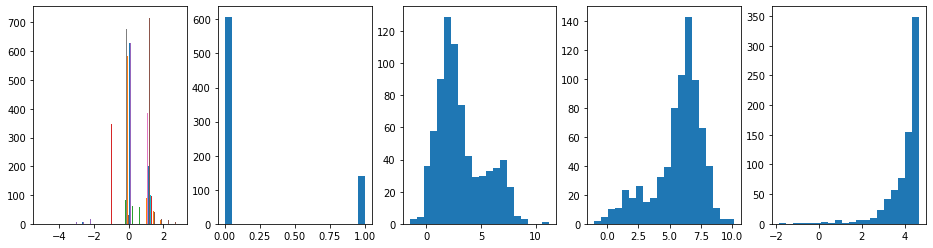

In [ ]:
bins=20
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
axs[0].hist(x_ihdp, bins=bins)
axs[1].hist(t_ihdp, bins=bins)
axs[2].hist(yf_ihdp, bins=bins)
axs[3].hist(ycf_ihdp, bins=bins)
axs[4].hist(ite_ihdp, bins=bins)
plt.show()

In [ ]:
np.mean(x_ihdp)

In [ ]:
x_jobs_flat = jobs['x'].reshape(-1,1)
t_jobs = jobs['t'].reshape(-1,1)
y_jobs = jobs['y'].reshape(-1,1)
e_jobs = jobs['e'].reshape(-1,1)

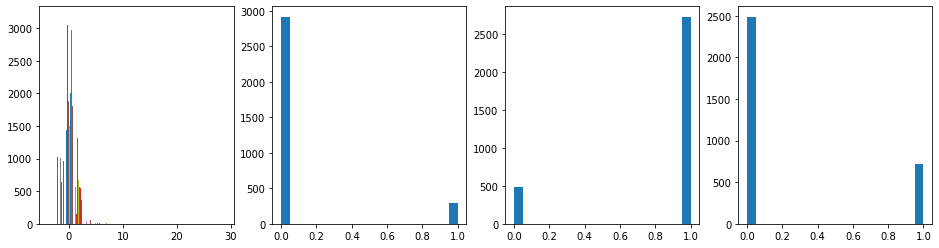

In [ ]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].hist(jobs['x'], bins=bins)
axs[1].hist(t_jobs, bins=bins)
axs[2].hist(y_jobs, bins=bins)
axs[3].hist(e_jobs, bins=bins)
plt.show()

In [ ]:
np.mean(x_jobs_flat)

In [ ]:
np.isnan(jobs['x'])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
def abs_ate(effect_true, effect_pred):
    """
    Absolute error for the Average Treatment Effect (ATE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: absolute error on ATE
    """
    
    ate = np.abs(np.mean(effect_true)-np.mean(effect_pred))
    return ate
    

def pehe(effect_true, effect_pred):
    """
    Precision in Estimating the Heterogeneous Treatment Effect (PEHE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: PEHE
    """
    
    a = np.sqrt(np.mean((effect_true-effect_pred)**2))
    return a

In [ ]:
x_jobs_train, x_jobs_test, t_jobs_train, t_jobs_test, y_jobs_train, y_jobs_test, e_jobs_train, e_jobs_test = train_test_split(jobs['x'], t_jobs, y_jobs, e_jobs, test_size=0.2)

scaler_x = StandardScaler()
x_jobs_train = scaler_x.fit_transform(x_jobs_train)
x_jobs_test = scaler_x.transform(x_jobs_test)

Random Forest

In [ ]:
# Random Forest with default parameters.
rf = RandomForestRegressor()

# Train on the training data.
# In the supervised setting, our usual X here consists of X and T.
# The target is Y - the outcome.
# Input: [X, T], output: Y.
# Hint: use np.concatenate or np.hstack functions to merge X and T.

xt_jobs_train = np.concatenate([x_jobs_train,t_jobs_train],axis=1)

rf.fit(xt_jobs_train,y_jobs_train.flatten())

# Predictions
# Note we set T to a specific value for ALL individuals.
# These are interventional distributions - P(Y|X, do(T=t)).

# Predict Y_0 given [X, 0]
# Hint: use np.zeros_like or np.zeros functions to get the zeros for all units.
# Hint 2: you still have to merge X and zeros (see training above).
xt0_jobs_test =  np.concatenate([x_jobs_test,np.zeros((643,1))],axis=1)

rf_y0_jobs_test = rf.predict(xt0_jobs_test)

# Predict Y_1 given [X, 1]
# Hint: use np.ones_like or np.ones functions to get the ones for all units.
# Hint 2: you still have to merge X and ones (see training above).
xt1_jobs_test = np.concatenate([x_jobs_test,np.ones((643,1))],axis=1)

rf_y1_jobs_test = rf.predict(xt1_jobs_test)

# Compute ITEs
# ITE = Y_1 - Y_0
rf_te_jobs_test = rf_y1_jobs_test - rf_y0_jobs_test


IPW

In [ ]:
def get_ps_weights(clf, x, t):
  ti = np.squeeze(t)
  clf.fit(x, ti)
  ptx = clf.predict_proba(x).T[1].T + 0.0001 # add a small value to avoid dividing by 0
  # Given ti and ptx values, compute the weights wi (see formula above):
  wi = (ti/ptx) + (1-ti)/(1-ptx)

  return wi

In [ ]:
# Get the sample weights
prop_clf = RandomForestClassifier()
weights = get_ps_weights(prop_clf, x_jobs_train, t_jobs_train)

# Train the regressor
rf_ipsw = RandomForestRegressor()

rf_ipsw.fit(xt_jobs_train, y_jobs_train.flatten(), sample_weight=''' pass the weights ''')

# Make predictions
rf_ipsw_y0_test = rf.predict(np.concatenate([xt_jobs_train,np.zeros_like(xt_jobs_train)],axis=1))
rf_ipsw_y1_test = rf.predict(np.concatenate([xt_jobs_train,np.ones_like(xt_jobs_train)],axis=1))

# Compute ITEs
rf_ipsw_te_test = rf_ipsw_y1_test - rf_ipsw_y0_test

In [ ]:
# X-Learner
xl_jobs = XLearner(models=RandomForestRegressor(), propensity_model=RandomForestClassifier())
xl_jobs.fit(y_jobs_train, t_jobs_train.flatten(), X=x_jobs_train)

xl_jobs_te_test = xl_jobs.effect(x_jobs_test)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
